케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 (더 깊게 테스트) ReuterDeep1.ipynb 에서 ReuterDeep2.ipynb ReuterDeep50.ipynb

In [9]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=1500, test_split=0.5)

len(train_data), len(test_data)

#train_data[5]

(5614, 5614)

In [10]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated ? 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 ? grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=1500):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [20]:
# 히든층이 4개인 경우 과적합 확인 학습은 빨리 진행되고 학습데이터에 대해서는 적합하나 테스트 데이터에 대해서는 성능이 오히려 나빠진다.

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
22/22 [==============================] - 1s 21ms/step - loss: 3.2651 - accuracy: 0.3051 - val_loss: 2.4083 - val_accuracy: 0.4752
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 1.9972 - accuracy: 0.5021 - val_loss: 1.7741 - val_accuracy: 0.5342
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 1.6634 - accuracy: 0.5734 - val_loss: 1.5877 - val_accuracy: 0.6245
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 1.4384 - accuracy: 0.6676 - val_loss: 1.4174 - val_accuracy: 0.6621
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 1.2289 - accuracy: 0.7095 - val_loss: 1.3038 - val_accuracy: 0.6927
Epoch 6/20
22/22 [==============================] - 0s 12ms/step - loss: 1.0425 - accuracy: 0.7455 - val_loss: 1.2220 - val_accuracy: 0.7129
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.8750 - accuracy: 0.7809 - val_loss: 1.2153 - val_accuracy: 0.7173
Epoch 8/20
22

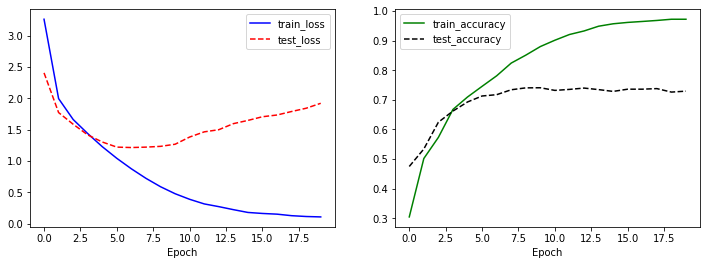

In [22]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [23]:
# 히든층이 3개인 경우 과적합 확인 학습은 빨리 진행되고 학습데이터에 대해서는 적합하나 테스트 데이터에 대해서는 성능이 오히려 나빠진다.

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
22/22 [==============================] - 1s 21ms/step - loss: 3.2267 - accuracy: 0.3388 - val_loss: 2.2856 - val_accuracy: 0.5169
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 1.8902 - accuracy: 0.5476 - val_loss: 1.6643 - val_accuracy: 0.6065
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 1.5065 - accuracy: 0.6521 - val_loss: 1.4386 - val_accuracy: 0.6671
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 1.2505 - accuracy: 0.7075 - val_loss: 1.2871 - val_accuracy: 0.7002
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 1.0349 - accuracy: 0.7620 - val_loss: 1.1876 - val_accuracy: 0.7289
Epoch 6/20
22/22 [==============================] - 0s 11ms/step - loss: 0.8546 - accuracy: 0.7996 - val_loss: 1.1295 - val_accuracy: 0.7439
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.7049 - accuracy: 0.8349 - val_loss: 1.1344 - val_accuracy: 0.7528
Epoch 8/20
22

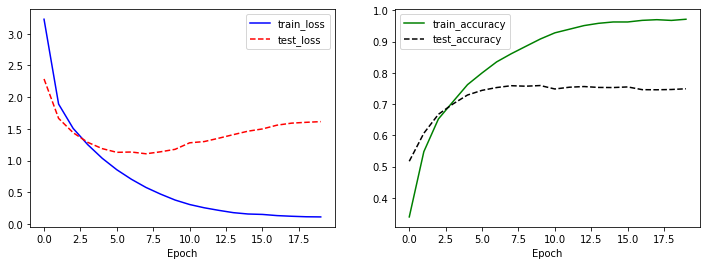

In [24]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [25]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
22/22 [==============================] - 1s 32ms/step - loss: 3.1749 - accuracy: 0.3076 - val_loss: 2.2855 - val_accuracy: 0.4204
Epoch 2/20
22/22 [==============================] - 0s 11ms/step - loss: 1.8788 - accuracy: 0.5509 - val_loss: 1.6452 - val_accuracy: 0.6240
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 1.4866 - accuracy: 0.6680 - val_loss: 1.4232 - val_accuracy: 0.6877
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 1.2475 - accuracy: 0.7130 - val_loss: 1.2784 - val_accuracy: 0.7091
Epoch 5/20
22/22 [==============================] - 0s 11ms/step - loss: 1.0485 - accuracy: 0.7597 - val_loss: 1.1724 - val_accuracy: 0.7357
Epoch 6/20
22/22 [==============================] - 0s 11ms/step - loss: 0.8704 - accuracy: 0.8037 - val_loss: 1.1002 - val_accuracy: 0.7558
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.7274 - accuracy: 0.8327 - val_loss: 1.0592 - val_accuracy: 0.7633
Epoch 8/20
22

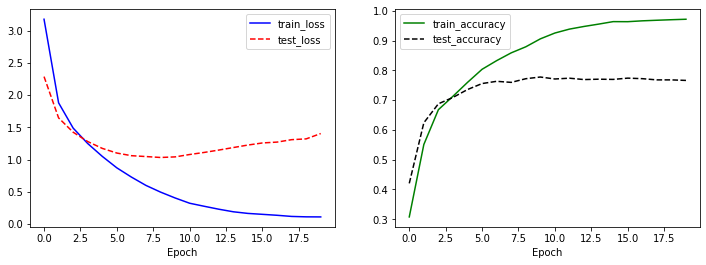

In [27]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [28]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
22/22 [==============================] - 1s 18ms/step - loss: 2.8285 - accuracy: 0.3901 - val_loss: 2.0362 - val_accuracy: 0.5335
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 1.7356 - accuracy: 0.6046 - val_loss: 1.5414 - val_accuracy: 0.6505
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 1.3625 - accuracy: 0.6879 - val_loss: 1.3222 - val_accuracy: 0.7024
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 1.1314 - accuracy: 0.7551 - val_loss: 1.1923 - val_accuracy: 0.7367
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.9585 - accuracy: 0.7921 - val_loss: 1.1014 - val_accuracy: 0.7558
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.8170 - accuracy: 0.8162 - val_loss: 1.0457 - val_accuracy: 0.7652
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.6973 - accuracy: 0.8408 - val_loss: 0.9975 - val_accuracy: 0.7741
Epoch 8/20
22

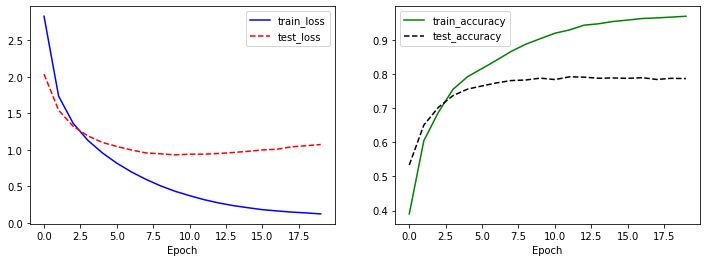

In [29]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()